## Recommender System

In this notebook we will focus on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case movies.

In [1]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
import pandas as pd
import numpy as np

We have two datasets, u.data that contains data related to the users, and Movie_Id_Titles that contains the relatoin between the id of the movie and its title.

The first dataset contains the following information: user_id, item_id, rating and timestamp.

Let's read both data sets.

In [2]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('u.data', sep='\t', names=column_names)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [4]:
movie_titles = pd.read_csv('Movie_Id_Titles')
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


Let's merge both datasets to have the name of the movie. Since both datasets have the **item_id** column, we will merge it on that column.

In [5]:
df = pd.merge(df, movie_titles, on='item_id')
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,0,172,5,881250949,"Empire Strikes Back, The (1980)"
2,0,133,1,881250949,Gone with the Wind (1939)
3,196,242,3,881250949,Kolya (1996)
4,186,302,3,891717742,L.A. Confidential (1997)


Let's do a little of exploratory analysis.

First of all we will check the mean rating of the movies and we will sort it descending, to see the best rated movies.

In [6]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

Now we can see the best rated movies, but we don't know how many people has voted these movies. It could be that just 1 person have voted a movie with 5 stars and it would appear as one of the best rated movies.

Let's see which are the most voted movies.

In [7]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

Let's create a new DF that contains the movie title as the index and the mean rating.

In [8]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


Let's add a new column to this DF that informs how many people has rated each movie.

In [9]:
ratings['num_of_ratings'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings.head()

,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


Let's plot a few charts to have an insight of the data.

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<Axes: >

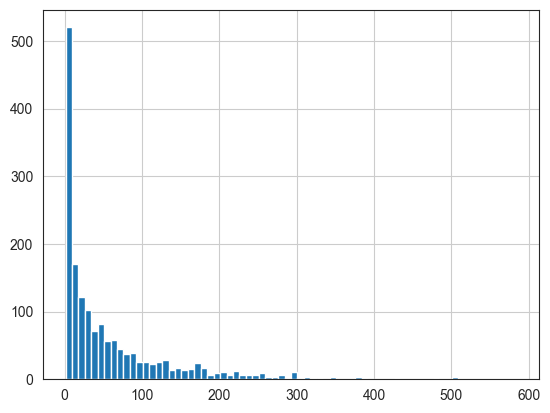

In [11]:
sns.set_style('white')
ratings['num_of_ratings'].hist(bins=70)

We see that most of the movies have few votes.

<Axes: >

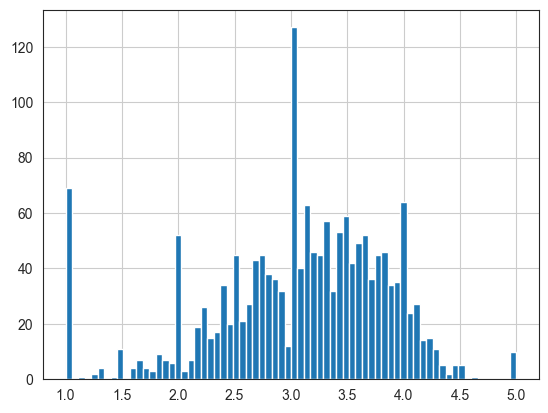

In [12]:
ratings['rating'].hist(bins=70)

Here we can see that there are peaks at the values of 1, 2, 3, 4 and 5. This is due to how the voting system is made.
There are also outliers at 1 and 5. These behaviour can be explained by assuming that these movies are seen by few people and
they voted them with 1 or 5.

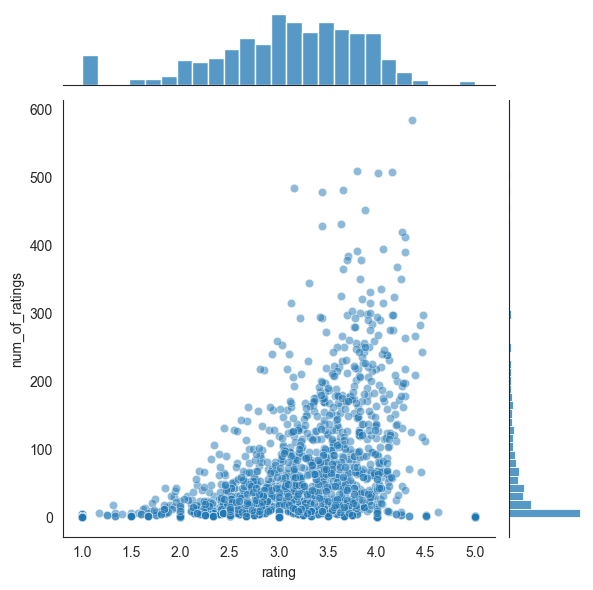

In [13]:
sns.jointplot(x='rating', y='num_of_ratings', data=ratings, alpha=0.5)

Here we see the expected behaviour: more reviews, more ratings. Except for the outliers of 5 and 1 that can be explained like we said earlier.

### Building the recommendation system

Let's create a matrix with the **user_id** and the **title** with the **rating** as values.

In [14]:
moviemat = df.pivot_table(index='user_id', columns = 'title', values='rating')
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that there are a lot of NaN values. This make sense since most of the user have not seen and rated most of the movies.

Let's see the most rated movies.

In [15]:
ratings.sort_values('num_of_ratings', ascending=False).head()

,rating,num_of_ratings
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


We will pick two movies, as an example, and we will make this recommender system for these two movies.

For instance let's pick Star Wars and Liar Liar.

In [16]:
starwars_user_ratings = moviemat['Star Wars (1977)']
liarliar_user_ratings = moviemat['Liar Liar (1997)']

starwars_user_ratings.head()
liarliar_user_ratings.head()

user_id
0    NaN
1    NaN
2    1.0
3    2.0
4    5.0
Name: Liar Liar (1997), dtype: float64

To do the correlation we will use the pandas method **corrwith()**

In [17]:
similar_to_starwars = moviemat.corrwith(starwars_user_ratings, drop=True)

similar_to_starwars.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [18]:
similar_to_liarliar = moviemat.corrwith(liarliar_user_ratings)

similar_to_liarliar.head()

title
'Til There Was You (1997)    0.118913
1-900 (1994)                      NaN
101 Dalmatians (1996)        0.469765
12 Angry Men (1957)          0.066272
187 (1997)                   0.175145
dtype: float64

Let's create a DF of the correlation for each movie and eliminate the null values.

In [19]:
corr_starwars = pd.DataFrame(similar_to_starwars, columns=['Correlation'])
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


Now we have a DF where the index is the movie title and it has de *Correlation* column. This column explains how correlated is the user rating of the movie with the user rating of Star Wars.

If we sort this DF descending we will see the movies that are most correlated with Star Wars.

In [20]:
corr_starwars.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


We see that appear movies that are not really correlated with Star Wars. This can be explained saying that the user has seen for instance Hollow Reed and voted it with 5 stars and also voted Star Wars with 5 stars.

To solve this behaviour we can set a threshold of number of reviews to our model.

To pick this treshold we can analyze the *num_of_ratings* histogram.

First of all let's add the column **num_of_ratings** to our correlation DF.

In [21]:
corr_starwars = corr_starwars.join(ratings['num_of_ratings'])
corr_starwars.head()

,Correlation,num_of_ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


Now that we have the number of ratings for each movie in our correlation DF we can proceed to discard those which the number of ratings are below 100.

In [22]:
corr_starwars[corr_starwars['num_of_ratings']>100].sort_values('Correlation', ascending=False).head(10)

,Correlation,num_of_ratings
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


Now we see a much more expected behaviour. For instance the movie *The Empire Strikes Back* appears as a high correlated movie to *Star Wars* which makes sense since *The Empire  Strikes Back* is a Star Wars movie.


Let's do the same with *Liar Liar* movie.

In [23]:
corr_liarliar = pd.DataFrame(similar_to_liarliar, columns = ['Correlation'])
corr_liarliar.dropna(inplace=True)

In [24]:
corr_liarliar = corr_liarliar.join(ratings['num_of_ratings'])

In [25]:
corr_liarliar[corr_liarliar['num_of_ratings']>100].sort_values('Correlation', ascending = False).head()

,Correlation,num_of_ratings
title,,
Liar Liar (1997),1.000000,485
Batman Forever (1995),0.516968,114
"Mask, The (1994)",0.484650,129
Down Periscope (1996),0.472681,101
Con Air (1997),0.469828,137
